In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import pandas as pd
import numpy as np
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
from collections import defaultdict
from pathlib import Path

In [4]:
base_keys = list({
                'gACH':(0,0),
                'rDA':(0,0),
                'gDA':(0,0),
                'photometryCenterInIndex':(0,0),
                'photometryCenterOutIndex':(0,0),
                'photometrySideInIndex':(0,0),
                'photometrySideInIndexr':(0,0),
                'photometrySideOutIndex':(0,0),
                'sl': (0,0),
                'spnnrOff': (0,0),
                'photometryCenterInIndex':(0,0),
                'photometryCenterOutIndex':(0,0),
                'photometrySideInIndexAA':(0,0),
                'photometrySideInIndexAa':(0,0),
                'photometrySideInIndexaA':(0,0),
                'photometrySideInIndexaa':(0,0),
                'photometrySideInIndexAB':(0,0),
                'photometrySideInIndexAb':(0,0),
                'photometrySideInIndexaB':(0,0),
                'photometrySideInIndexab':(0,0),
                'photometrySideOutIndex':(0,0),
                'sl': (0,0),
                'spnnrOff': (0,0),
                }.keys())
# base_keys

used_run_majors = ['base_simple', 'base_words', '_to_']


In [5]:
# load_folder = base_location / Path(r'Figure_6_g1')
# h5_beta_locations = str((load_folder / Path(r'all/glu_run_*/coefs/*_best_coeffs.h5')).resolve())

# out_folder = base_location / Path(r'final_outputs_glu_run')

In [6]:
h5_lst = defaultdict(list)
run_id_dct = defaultdict(list)

# base_location = Path(r'/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/outputs')
base_location = Path(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs')

fig_folder_lst = [# ('Figure_1_2', 'f1*-ft'),
#                   ('Figure_3',   'f3*-ft'),
#                   ('Figure_4_g1',   'f4*-ft'),
#                   ('Figure_4_g2',   'f4*-ft'),
#                   ('Figure_5_g1',   'f5*-ft'),
#                   ('Figure_5_g2',   'f5*-ft'),
#                   ('Figure_5_g5',   'f5*-ft'),
#                    ('Figure_6_g1', 'glu_run_20221202-no-CO_0-ft')
#                    ('Figure_6_g1', 'glu_run_20221202-30sft_0-ft')
#                    ('Figure_6_g1', 'glu_run_20221202-30sft-reduc_0-ft')
#                    ('Figure_6_g1', 'glu_run_20221202-30sft-paperfig_0-ft')
#                    ('Figure_6_g1-20sft', 'glu_run_20221212-20sft-paperfig_0-ft')
#                    ('Figure_6_g1-50sft', 'glu_run_20221213-50sft-paperfig_0-ft')
                   ('Figure_6_g1--20_20sft', 'glu_run_20220109--20_20sft_0-ft')
                 ]

for fig_folder in fig_folder_lst:
    print('fig_folder', fig_folder)
    
    load_folder = base_location / Path(fig_folder[0])
    # load_folder = base_location / Path(r'tmp')
    h5_beta_locations = str((load_folder / Path('all') / Path(fig_folder[1]) / Path(r'coefs\*_best_coeffs.h5')).resolve())
    
    
    print(h5_beta_locations)
    


#     base_location = Path(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs')

#     load_folder = base_location / Path(r'Figure_1_2')
#     h5_beta_locations = str((load_folder / Path(r'all\f1*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_3')
#     # h5_beta_locations = str((load_folder / Path(r'all\f3*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_4_g1')
#     # h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_4_g2')
#     # h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_5_g1')
#     # h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_5_g2')
#     # h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())

#     out_folder = base_location / Path(r'final_outputs')

#     # h5_beta_locations = Path('/Users/josh/Dropbox (HMS)/jz/Tetanus/1194_1195_1214_1258_1259_2_best_coeffs.h5')
#     out_loc = str((out_folder).resolve())
#     h5_beta_locations = glob.glob(h5_beta_locations)


    subloc_out = Path(f'final_out_{fig_folder[1]}')
    out_folder = base_location / subloc_out

    out_loc = str((out_folder).resolve())
    h5_beta_locations = glob.glob(h5_beta_locations)

    fh.create_folder_if_not_exists(out_loc)
    
    h5_lst = defaultdict(list)
    for h5_coef_fn in h5_beta_locations:
        h5f = pd.HDFStore(h5_coef_fn)
        h5fk = h5f.keys()
        for key in h5fk:
            print(key)
            resp = key.split('_')[0].replace('/', '')
            model_version = '_'.join(key.split('_')[2:]).split('_run_num')[0]
            model_version = model_version.replace('5_base_words_gDA_to_gACH', '5_base_words_rDA_to_gACH')
    #         print(resp, model_version)
            h5_df = pd.read_hdf(h5f, key).reset_index()
            h5_df['fn'] = h5_coef_fn
            h5_df['key'] = key
            h5_df = h5_df.set_index(['fn','key'])


            h5_df = h5_df.sort_values('channel_name')
            h5_df['channel'] = h5_df['channel_name'].str.split('_').apply(lambda x: x[0])
            h5_df['run_num'] = h5_df['channel_name'].str.split('_').apply(lambda x: x[-1])

            h5_lst[(resp, model_version)].append(h5_df)
    #         h5_lst.append(h5_df)
    # concat = pd.concat(h5_lst, axis=0)

    fh.create_folder_if_not_exists(out_loc)



    a = None
    b = None

    h5_dfs = dict(h5_lst)
    for key in h5_dfs:
        run_major = '='.join(key)

        cont = True
        for runmajor in used_run_majors:
            if runmajor in run_major:
                cont = False
        if cont:
            continue

        val = h5_dfs[key]
        concat = pd.concat(val)

        all_kernels = []
        for base_key in base_keys:
            all_kernels += dfh.get_kernel_from_basename(base_key, list(concat.columns))


        gb_columns = ['mouse_id', 'channel', 'name']
        ak_unagg = concat.reset_index().set_index(['mouse_id', 'channel', 'name', 'run_num'])[all_kernels]

        ak_unagg.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-kernels_raw-{run_major}.csv').resolve()))

        kernels = ak_unagg.groupby(gb_columns).agg([np.mean, np.size, np.std])
        kernels = kernels.swaplevel(axis=1)

        ak = concat[all_kernels].copy()
        new_cols = [(dfh.shorten_col_name(_.split('_')[0]), int(_.split('_')[1])) for _ in ak.columns]



        ak.columns = pd.MultiIndex.from_tuples(new_cols)
        ak['1'] = 1
        akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()
        akgb.loc['sem'] = akgb.loc['std']/np.sqrt(akgb.loc['size'])
    #     akgb = akgb.loc[['mean', 'sem']]
        final_out = akgb.stack(1).unstack(0).copy()
        final_out.columns = ['_'.join(_) for _ in final_out.columns]

    #     if a is None:
    #         a = final_out
    #     else:
    #         b = final_out
    #         break

    #     print(final_out.shape)
        final_out.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-kernels-{run_major}.csv').resolve()))
        
#         display(final_out)

    #     break

fig_folder ('Figure_6_g1--20_20sft', 'glu_run_20220109--20_20sft_0-ft')
C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs\Figure_6_g1--20_20sft\all\glu_run_20220109--20_20sft_0-ft\coefs\*_best_coeffs.h5
Created directory: C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs\final_out_glu_run_20220109--20_20sft_0-ft
/gGLUr_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__0
/gGLUr_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__1
/gGLUr_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__2
/gGLUr_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__3
/gGLUr_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__4
/gGLUr_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_run_num__5
/gGLUr_0_0_base_simple_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____

C:\Users\Josh\AppData\Local\Temp\ipykernel_22396\2174043367.py:130: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()


In [7]:
h5_beta_locations

['C:\\Users\\Josh\\Documents\\GitHub\\sabatinilab-glm\\sglm\\outputs\\Figure_6_g1--20_20sft\\all\\glu_run_20220109--20_20sft_0-ft\\coefs\\1299_1300_1301_1302_0_max_iter10000__fit_interceptFalse__alpha0____0__l1_ratio0____0_best_coeffs.h5']

In [8]:
final_out

,CI_mean,CI_sem,CI_size,CI_std,SIAA_mean,SIAA_sem,SIAA_size,SIAA_std,SIAB_mean,SIAB_sem,...,SO_size,SO_std,sl_mean,sl_sem,sl_size,sl_std,spnnrOff_mean,spnnrOff_sem,spnnrOff_size,spnnrOff_std
-20,-0.269117,0.007187,10.0,0.022729,-0.171141,0.008469,10.0,0.026781,0.318200,0.042320,...,10.0,0.015419,0.039471,0.002357,10.0,0.007452,-0.219801,0.025228,10.0,0.079777
-19,-0.307215,0.007802,10.0,0.024671,-0.164360,0.008425,10.0,0.026642,-0.058115,0.052282,...,10.0,0.018767,0.056772,0.003177,10.0,0.010047,-0.234476,0.021508,10.0,0.068015
-18,-0.333662,0.007285,10.0,0.023038,-0.183244,0.007419,10.0,0.023460,0.027943,0.035008,...,10.0,0.022262,0.058065,0.003131,10.0,0.009900,-0.230473,0.015396,10.0,0.048685
-17,-0.340775,0.008757,10.0,0.027692,-0.230789,0.009627,10.0,0.030444,0.019802,0.048772,...,10.0,0.025775,0.056477,0.003064,10.0,0.009689,-0.220741,0.021258,10.0,0.067223
-16,-0.309952,0.008883,10.0,0.028091,-0.313547,0.007701,10.0,0.024352,-0.051195,0.047344,...,10.0,0.022652,0.052863,0.002417,10.0,0.007642,-0.185197,0.026637,10.0,0.084234
-15,-0.326649,0.008714,10.0,0.027557,-0.342881,0.008480,10.0,0.026816,-0.081084,0.104389,...,10.0,0.015478,0.056370,0.001500,10.0,0.004745,-0.165584,0.033355,10.0,0.105479
-14,-0.327265,0.007560,10.0,0.023907,-0.369338,0.009924,10.0,0.031381,-0.151944,0.047236,...,10.0,0.022442,0.052023,0.001976,10.0,0.006250,-0.181045,0.032072,10.0,0.101421
-13,-0.392383,0.005685,10.0,0.017979,-0.423344,0.009276,10.0,0.029333,0.273140,0.046544,...,10.0,0.033782,0.058689,0.002275,10.0,0.007195,-0.222921,0.028456,10.0,0.089986
-12,-0.442258,0.006299,10.0,0.019918,-0.450632,0.008775,10.0,0.027749,-0.303283,0.064014,...,10.0,0.023848,0.070165,0.002641,10.0,0.008351,-0.114511,0.024504,10.0,0.077487
-11,-0.491107,0.005814,10.0,0.018385,-0.526018,0.010216,10.0,0.032306,-0.365833,0.064971,...,10.0,0.029352,0.072061,0.001847,10.0,0.005840,-0.062369,0.017548,10.0,0.055491


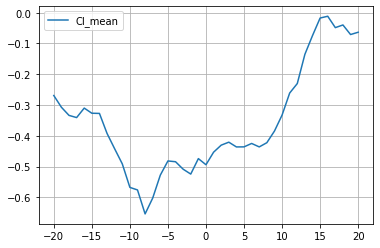

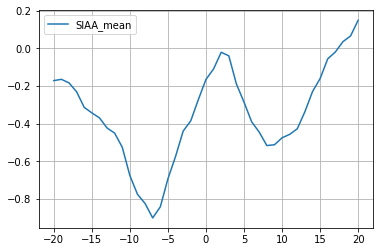

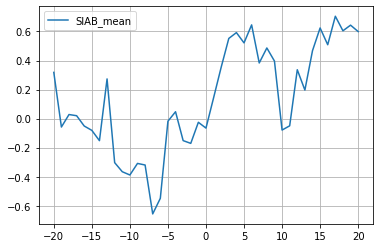

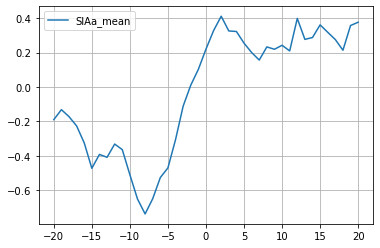

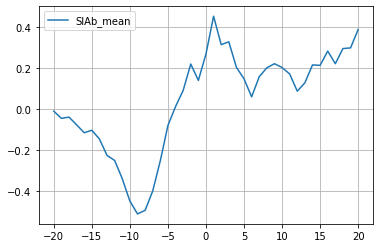

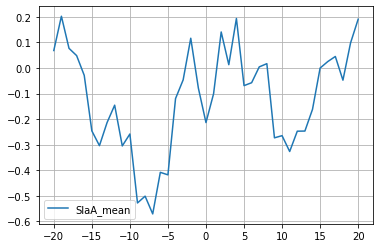

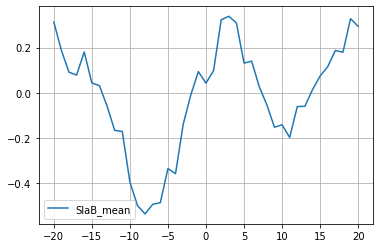

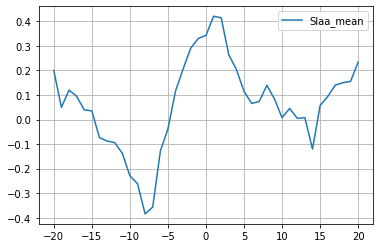

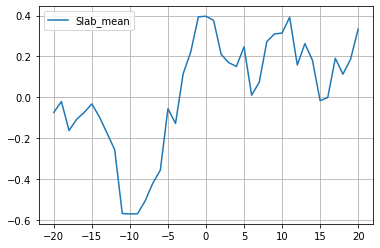

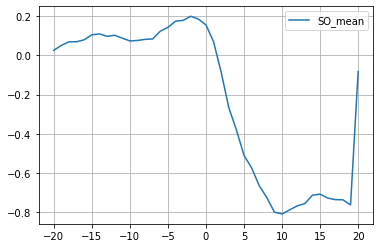

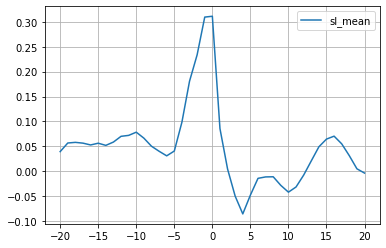

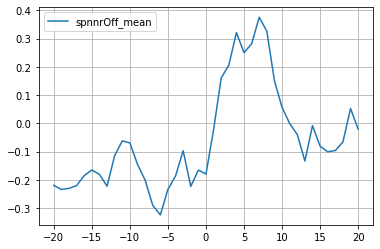

In [9]:
import matplotlib.pyplot as plt
for foc in final_out.columns:
    if 'mean' in foc:
        plt.figure()
        final_out[foc].plot(label=foc)
        plt.legend()
        plt.grid()